# Prosjektoppgave 2 TEK5020

#### Mattias Xu, Vladimir Monakhov, Birk Torpmann-Hagen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from PIL import Image
from dataset import Dataset

Vi har valgt bildene av permer som er vedlagt i oppgavebeskrivelsen. Her blir de lest inn og de egnede regionene blir valgt

In [2]:
img2 = plt.imread("data/Bilde2.png")
img2_regions = [
    [[350, 550], [225, 500]], #Blue folder, with metal
    [[200,470], [750,1000]], # Red folder, with metal and papers
    [[100, 300], [100, 300]] # Floor
]
img2_test_region = [
    [[30, 845], [85, 1172]]
]

img3 = plt.imread("data/Bilde3.png")
img3_test_region = [
    [[50, img3.shape[0]-80], [100, img3.shape[1]-100]] # A region which excludes the thick, white, outline
]

In [3]:
border_train = (85, 30, 1172, 845)
crop1 = (225, 350, 500, 550)
crop2 = (750, 200, 1000, 470)
crop3 = (100, 100, 300, 300)
border_test = (100, 50, img3.shape[1]-100, img3.shape[0]-80)
im = Image.open("data/Bilde2.png")
im_orig = im.crop(border_train)
im1 = im.crop(crop1)
im2 = im.crop(crop2)
im3 = im.crop(crop3)
im = Image.open("data/Bilde3.png")
imtest = im.crop(border_test)

Treningsbildet vist sammen med regionene som blir brukt som trening for de tre klassene, rød perm, blå perm og bakgrunn.

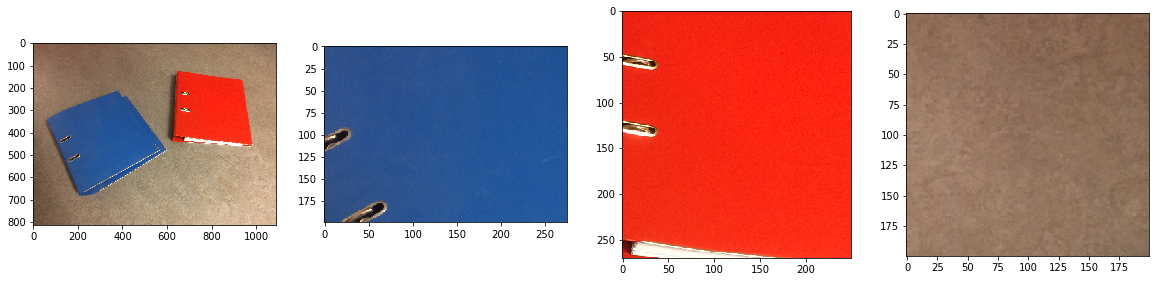

In [4]:
images = [im_orig, im1, im2, im3]
plt.figure(figsize=(20,10))
columns = 4
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [8]:
train_dataset = Dataset(img2, img2_regions) # Data from selected crops
train_image_dataset = Dataset(img2, img2_test_region) # Whole image, with border cropped away

test_dataset = Dataset(img3, img3_test_region) # Test image, with border cropped away
train_x, train_y = train_dataset.get_data() # Training regions, with labels

train_img, _ = train_image_dataset.get_data() # Image, to test classifier on it later
test_x, _ = test_dataset.get_data() # Test image

In [7]:
# Minimum feilrate fra oppgave 1 var veldig treg så bruker en fra sklearn
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

## Resultat på treningsbildet

In [9]:
train_segmented = clf.predict(train_img).reshape((815, 1087))

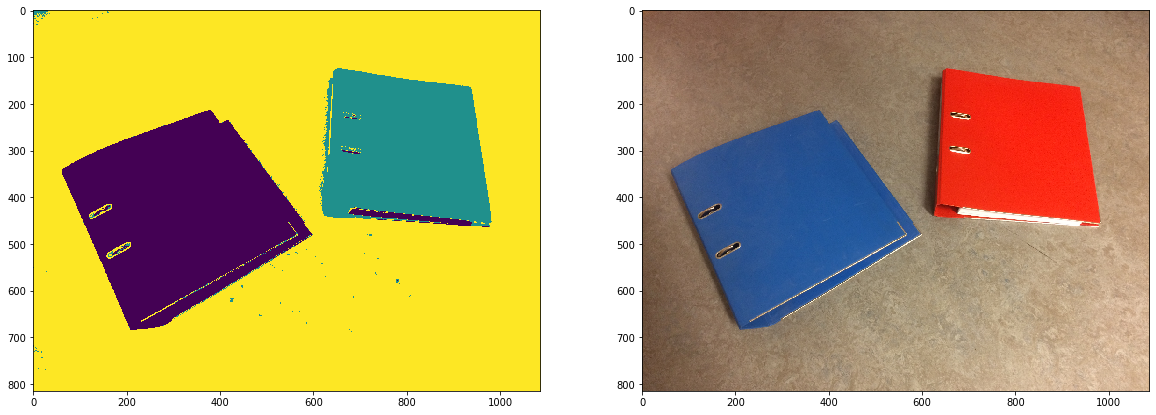

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(train_segmented)
plt.subplot(1, 2, 2)
plt.imshow(im_orig)
plt.show()

## Resultat på testbildet

In [11]:
test_segmented = clf.predict(test_x).reshape((781, 1060))

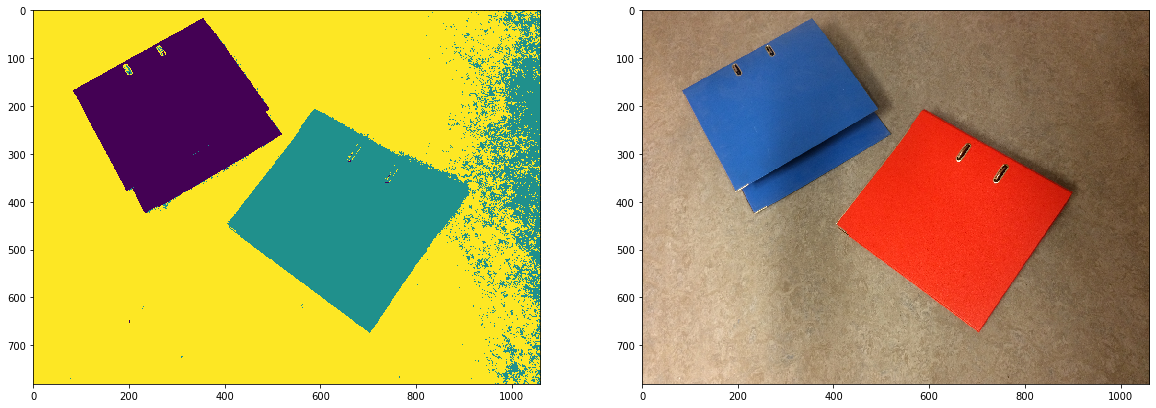

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(test_segmented)
plt.subplot(1, 2, 2)
plt.imshow(imtest)
plt.show()

Stort sett kan man se at det segmenteringen fungerer ganske bra, både på treningsbildet og testbildet. På treningsbildet er permene stort sett segmentert riktig, men pikslene i arkene i den røde permen blir klassifisert til å være blå perm. Blått er ikke nærmere hvitt enn rødt hvis man ser på RGB-verdier, men det kan være at blånyansen til permen er litt nærmere hvitt enn rødnyansen.

Øverst til venstre i treningsbildet blir bakgrunnen klassifisert som rød perm, men ser man nøye etter er det litt rødskjær i bildet. Dette kan være grunnen til at klassifikatoren klassifiserer feil her.

På testbildet blir også permene segmentert bra, men her blir en mye større del av bakgrunnen feilklassifisert. Man kan se på testbildet at det er ganske mørkt til høyre, og dette er trolig grunnen til at det blir feilklassifisert.